In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [9]:
# load dataset
customer_data = pd.read_csv('Mall_Customers.csv')

In [10]:
# Preview dataset
print(customer_data.head())
print(customer_data.shape)
print(customer_data.info())
print(customer_data.isnull().sum())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender        

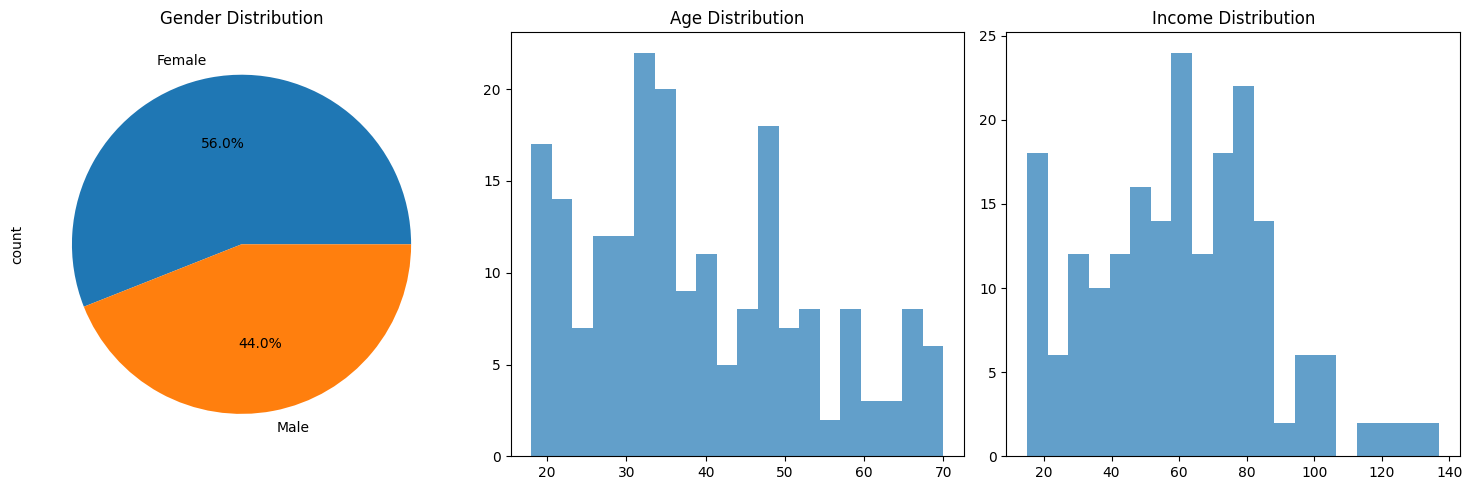

In [11]:
# Basic data overview graphs
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
customer_data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')

plt.subplot(1, 3, 2)
plt.hist(customer_data['Age'], bins=20, alpha=0.7)
plt.title('Age Distribution')

plt.subplot(1, 3, 3)
plt.hist(customer_data['Annual Income (k$)'], bins=20, alpha=0.7)
plt.title('Income Distribution')

plt.tight_layout()
plt.show()

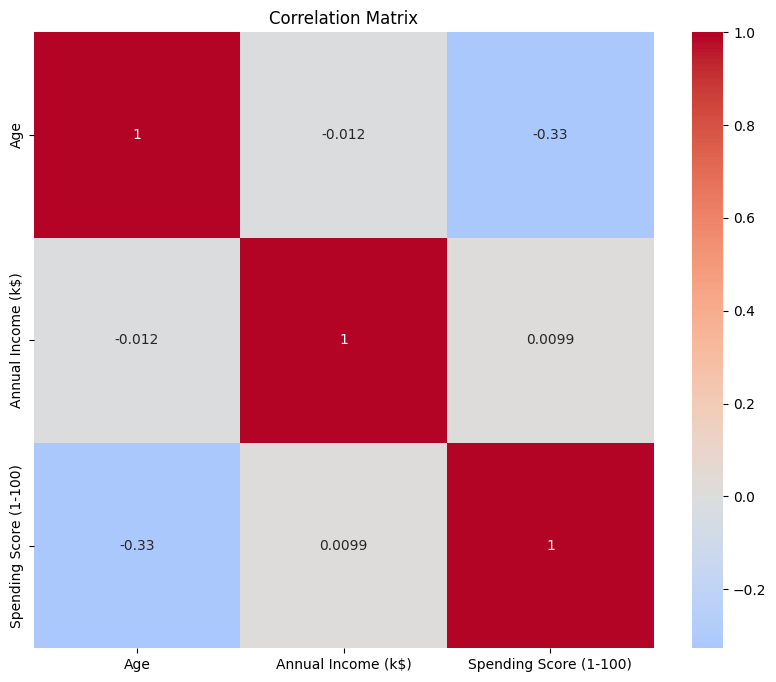

In [12]:
# Heatmap to check correlation between numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Selection of features for clustering
X = customer_data.iloc[:,[3,4]].values

In [14]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [15]:
#Choosing the number of clusters

#WCSS -> Within Clusters Sum of Squares

# Finding optimal number of clusters using Elbow Method
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

C:\Users\palak\miniconda3\envs\ML_Internship\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\palak\miniconda3\envs\ML_Internship\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\palak\miniconda3\envs\ML_Internship\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\palak\miniconda3\envs\ML_Internship\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there a

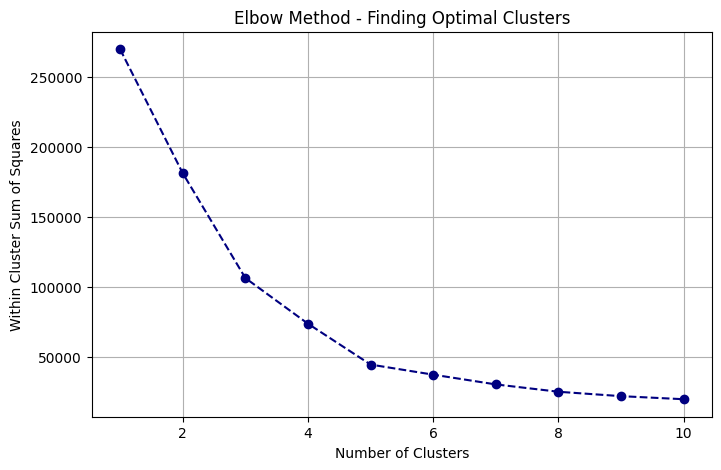

In [16]:
# plot an elbow graph

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='navy')
plt.title('Elbow Method - Finding Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.grid(True)
plt.show()

In [17]:
#Optimum Number of Clusters = 5
# Applying KMeans with k=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

C:\Users\palak\miniconda3\envs\ML_Internship\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\palak\miniconda3\envs\ML_Internship\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


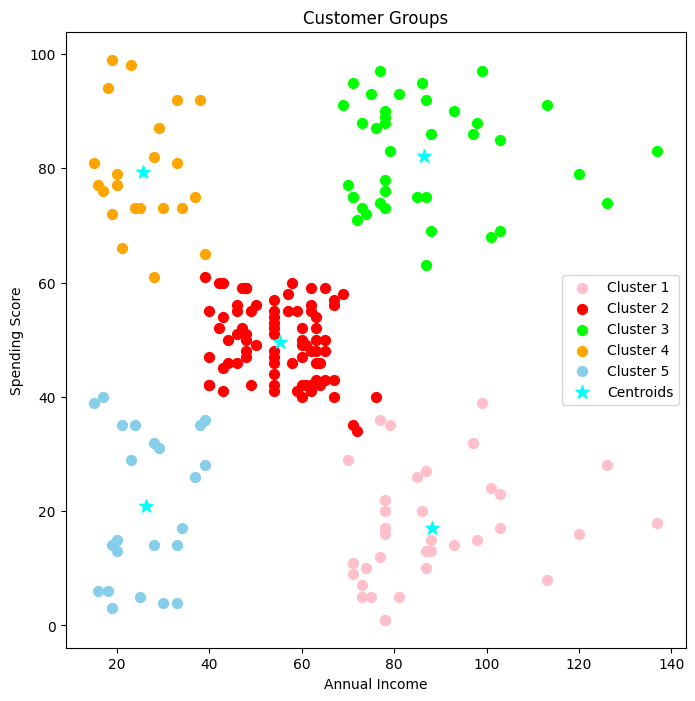

In [23]:
#5 Clusters - 0, 1, 2, 3, 4

#Visualizing all the Clusters
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='pink', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='lime', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='orange', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='skyblue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', marker="*", label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

C:\Users\palak\AppData\Local\Temp\ipykernel_4024\207823847.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spending = customer_data.groupby('Age_Group')['Spending Score (1-100)'].mean()
C:\Users\palak\AppData\Local\Temp\ipykernel_4024\207823847.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_income = customer_data.groupby('Age_Group')['Annual Income (k$)'].mean()


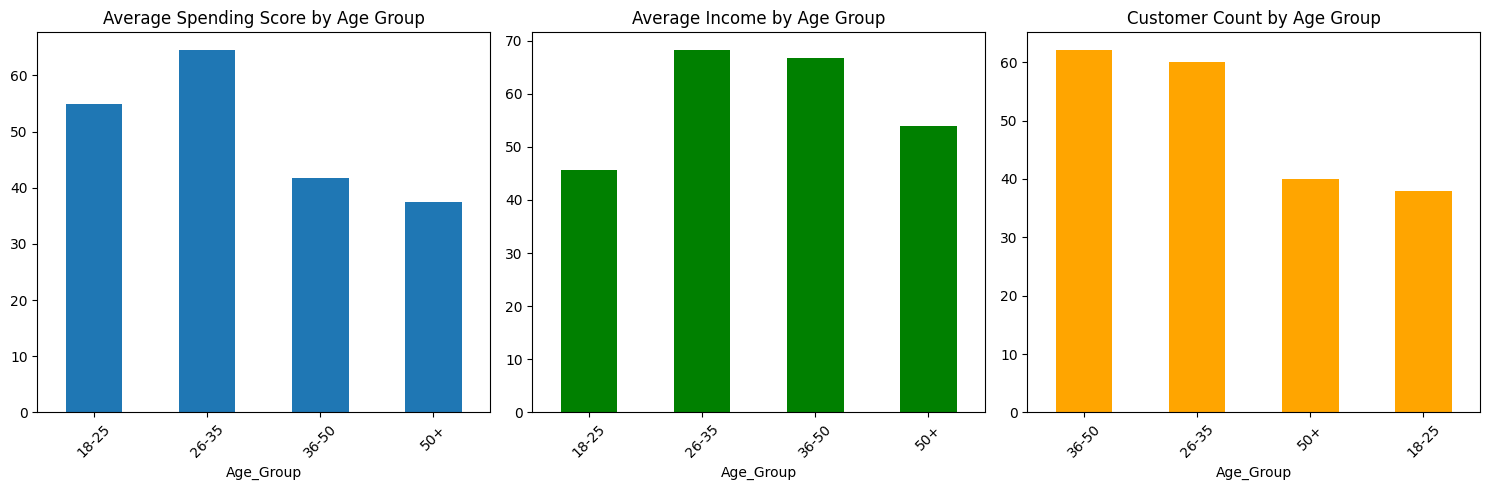

In [24]:
# Age group analysis
age_groups = pd.cut(customer_data['Age'], bins=[0, 25, 35, 50, 100], 
                   labels=['18-25', '26-35', '36-50', '50+'])
customer_data['Age_Group'] = age_groups

plt.figure(figsize=(15, 5))

# Barplot to show avg spending score per age group
plt.subplot(1, 3, 1)
age_spending = customer_data.groupby('Age_Group')['Spending Score (1-100)'].mean()
age_spending.plot(kind='bar')
plt.title('Average Spending Score by Age Group')
plt.xticks(rotation=45)

# barplot for avg income per age group
plt.subplot(1, 3, 2)
age_income = customer_data.groupby('Age_Group')['Annual Income (k$)'].mean()
age_income.plot(kind='bar', color='green')
plt.title('Average Income by Age Group')
plt.xticks(rotation=45)

# Bar plot showing total number of people in each age group
plt.subplot(1, 3, 3)
customer_data['Age_Group'].value_counts().plot(kind='bar', color='orange')
plt.title('Customer Count by Age Group')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
#Learnings
- Learned how unsupervised learning can reveal hidden patterns in customer behavior.
- Understood the importance of choosing the right number of clusters using the Elbow method.
- Gained practical experience in visualizing and interpreting clusters using matplotlib.

#Changes made
- Changed the color scheme and markers in the cluster visualization to make it more intuitive.
- Renamed axes and titles to better reflect the context of the data.
